# Cluster Count
In this notebook, we will try to extract further information from Morpheus logger file. We will try to count the number of cluster in a hexagonal grid at different time points. To do so, we will use a function called `get_clusters_count()`.

The function takes the Morpheus log output as pd.df, the field of interest that contains clusters data, a list of cell type that are member of the cluster formation, the time step between time points, the time interval where we want to count the number of clusters (optional), the time symbol (optional) as specified in the Morpheus model. The output will be the total number of clusters for a specific time point.

Let try to use the function now, but before we start, let's define some required parameters. First, let's create a simple logger file in a CSV format:


In [11]:
import csv
import tempfile
import os

full_path=os.path.join(tempfile.gettempdir(), "logger.csv")

csvfile=open(full_path,'w', newline='')
obj=csv.writer(csvfile, delimiter='\t')
obj.writerow(['t', 'cell.id', 'RNA_concentration', 'infection'])
obj.writerow(['0', '1', '0.1' ,'1'])
obj.writerow(['0', '2', '0.2' ,'0'])
obj.writerow(['0', '3', '0.3' ,'1'])
obj.writerow(['0', '4', '0.4' ,'1'])
obj.writerow(['0', '5', '0.5' ,'1'])
obj.writerow(['0', '6', '0.6' ,'0'])
obj.writerow(['0', '7', '0.7' ,'0'])
obj.writerow(['0', '8', '0.8' ,'0'])
obj.writerow(['0', '9', '0.9' ,'0'])
obj.writerow(['0', '10', '0.9' ,'0'])
obj.writerow(['0', '11', '0.9' ,'1'])
obj.writerow(['0', '12', '0.9' ,'1'])
obj.writerow(['0', '13', '0.9' ,'1'])
obj.writerow(['0', '14', '0.9' ,'0'])
obj.writerow(['0', '15', '0.9' ,'0'])
obj.writerow(['0', '16', '0.9' ,'0'])
obj.writerow(['0', '17', '0.9' ,'0'])
obj.writerow(['0', '18', '0.9' ,'0'])
obj.writerow(['0', '19', '0.9' ,'1'])

obj.writerow(['1', '1', '0.1' ,'1'])
obj.writerow(['1', '2', '0.2' ,'1'])
obj.writerow(['1', '3', '0.3' ,'1'])
obj.writerow(['1', '4', '0.4' ,'1'])
obj.writerow(['1', '5', '0.5' ,'1'])
obj.writerow(['1', '6', '0.6' ,'1'])
obj.writerow(['1', '7', '0.7' ,'0'])
obj.writerow(['1', '8', '0.8' ,'0'])
obj.writerow(['1', '9', '0.9' ,'0'])
obj.writerow(['1', '10', '0.9' ,'0'])
obj.writerow(['1', '11', '0.9' ,'1'])
obj.writerow(['1', '12', '0.9' ,'0'])
obj.writerow(['1', '13', '0.9' ,'1'])
obj.writerow(['1', '14', '0.9' ,'0'])
obj.writerow(['1', '15', '0.9' ,'0'])
obj.writerow(['1', '16', '0.9' ,'0'])
obj.writerow(['1', '17', '0.9' ,'0'])
obj.writerow(['1', '18', '0.9' ,'0'])
obj.writerow(['1', '19', '0.9' ,'1'])


csvfile.close()

the hexagonal grid we look like this:

Time_step=0:

               / \     / \     / \
             /     \ /     \ /     \
            | inf=0 | inf=0 | inf=1 |
            |c-id=17|c-id=18|c-id=19|
           / \     / \     / \     / \
         /     \ /     \ /     \ /     \
        | inf=1 | inf=0 | inf=0 | inf=0 |
        |c-id=13|c-id=14|c-id=15|c-id=16|
       / \     / \     / \     / \     / \
     /     \ /     \ /     \ /     \ /     \
    | inf=0 | inf=0 | inf=0 | inf=1 | inf=1 |
    |c-id=8 |c-id=9 |c-id=10|c-id=11|c-id=12|
     \     / \     / \     / \     / \     /
       \ /     \ /     \ /     \ /     \ /  
        | inf=1 | inf=1 | inf=0 | inf=0 |
        |c-id=4 |c-id=5 |c-id=6 |c-id=7 |
         \     / \     / \     / \     /
           \ /     \ /     \ /     \ /
            | inf=1 | inf=0 | inf=1 | 
            |c-id=1 |c-id=2 |c-id=3 |
             \     / \     / \     /
               \ /     \ /     \ /
               
Time_step=1:

               / \     / \     / \
             /     \ /     \ /     \
            | inf=0 | inf=0 | inf=1 |
            |c-id=17|c-id=18|c-id=19|
           / \     / \     / \     / \
         /     \ /     \ /     \ /     \
        | inf=1 | inf=0 | inf=0 | inf=0 |
        |c-id=13|c-id=14|c-id=15|c-id=16|
       / \     / \     / \     / \     / \
     /     \ /     \ /     \ /     \ /     \
    | inf=0 | inf=0 | inf=0 | inf=1 | inf=1 |
    |c-id=8 |c-id=9 |c-id=10|c-id=11|c-id=12|
     \     / \     / \     / \     / \     /
       \ /     \ /     \ /     \ /     \ /  
        | inf=1 | inf=1 | inf=1 | inf=0 |
        |c-id=4 |c-id=5 |c-id=6 |c-id=7 |
         \     / \     / \     / \     /
           \ /     \ /     \ /     \ /
            | inf=1 | inf=1 | inf=1 | 
            |c-id=1 |c-id=2 |c-id=3 |
             \     / \     / \     /
               \ /     \ /     \ /
           


We need to define the field of interest

In [15]:
field_of_interest='infection'

We also need to define the list of the cell types that are members of the cluster formation. In this simple example, we consider a cell to be infected only if it has a value of 1.

In [16]:
cluster_cell_types=[1]

Finally, we will specify the `time_symbol`, as specified in the Morpheus model.

In [4]:
t_symbol='t'

After defining all the required parameter, let's run the function. But before that, let's import the function's library. Don't forget to install the package first.

In [17]:
from fitmulticell.sumstat import hexagonal_cluster_sumstat as css

We also need to import external library form pyABC to read the CSV file as pandas df

In [18]:
import fitmulticell.util as util

No, we will read the CSV file using the "read_morpheus_log_file" function form the external library

In [19]:
logger_file = util.tsv_to_df("/tmp")

Let's see how the logger_file loks like

In [20]:
logger_file

t  cell.id  RNA_concentration  infection
0   0        1                0.1          1
1   0        2                0.2          0
2   0        3                0.3          1
3   0        4                0.4          1
4   0        5                0.5          1
5   0        6                0.6          0
6   0        7                0.7          0
7   0        8                0.8          0
8   0        9                0.9          0
9   0       10                0.9          0
10  0       11                0.9          1
11  0       12                0.9          1
12  0       13                0.9          1
13  0       14                0.9          0
14  0       15                0.9          0
15  0       16                0.9          0
16  0       17                0.9          0
17  0       18                0.9          0
18  0       19                0.9          1
19  1        1                0.1          1
20  1        2                0.2          1
21  1        3                0.3          1
22  1        4                0.4          1
23  1        5                0.5          1
24  1        6                0.6          1
25  1        7                0.7          0
26  1        8                0.8          0
27  1        9                0.9          0
28  1       10                0.9          0
29  1       11                0.9          1
30  1       12                0.9          0
31  1       13                0.9          1
32  1       14                0.9          0
33  1       15                0.9          0
34  1       16                0.9          0
35  1       17                0.9          0
36  1       18                0.9          0
37  1       19                0.9          1

In [23]:
cluster_count_result=css.get_clusters_count(logger_file, field_of_interest,cluster_cell_types,time_symbol=t_symbol)
print(f'the total number of cluster = {cluster_count_result}')

the total number of cluster = {0: 5, 1: 3}


We can also use the function with a specific time interval:

In [24]:
cluster_count_result=css.get_clusters_count(logger_file, field_of_interest,cluster_cell_types,time_interval=[0,1],time_symbol=t_symbol)
print(f'the total number of cluster = {cluster_count_result}')

the total number of cluster = {0: 5, 1: 3}


As stated in the output above, at `time_point` = 0 we had 5 clusters, but at `time_point` = 1 we had only 3 clusters.

We can plot the above result by using a function called `plot_cluster_count_all_time_point()`.

This function will takes the dictionary output of the `get_clusters_count_alltp()`. But before using the function, let's import its library:

In [27]:
from fitmulticell.sumstat import plot_sumstat as pss

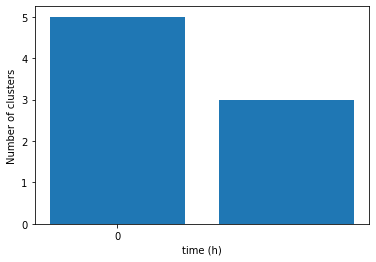

In [29]:
ax = pss.plot_cluster_count_all_time_point(cluster_count_result)